In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn import over_sampling
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt  
from matplotlib.pyplot import figure

In [3]:
df=pd.read_csv("bank-additional-full.csv",sep=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.duplicated().sum()

12

In [6]:
df[df.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


age


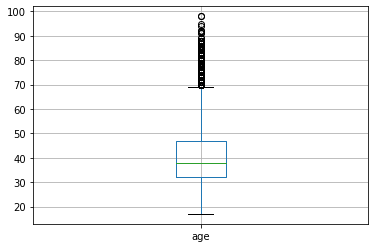


duration


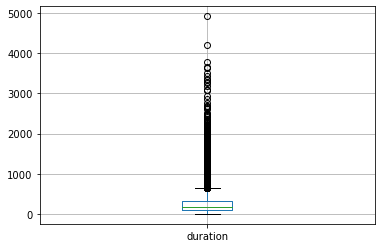


campaign


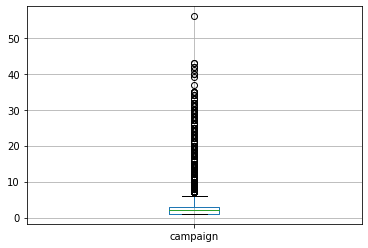


pdays


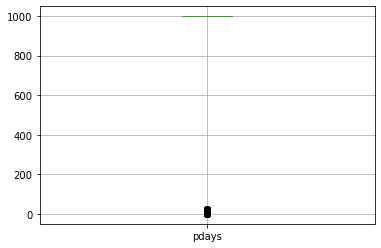


previous


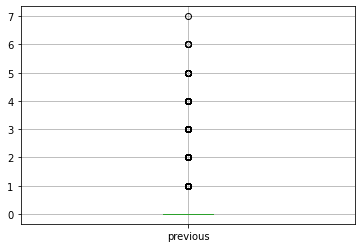


emp.var.rate


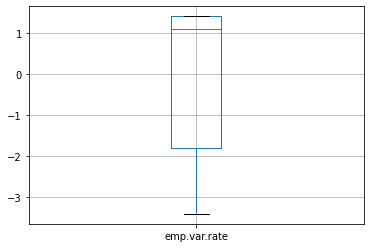


cons.price.idx


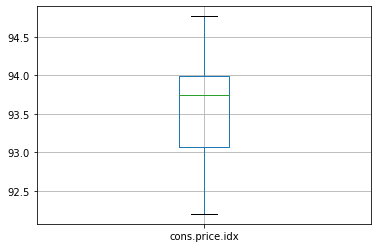


cons.conf.idx


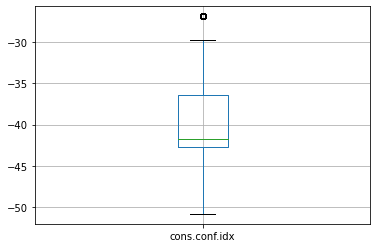


euribor3m


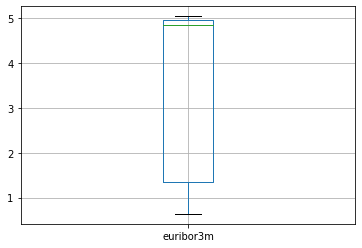


nr.employed


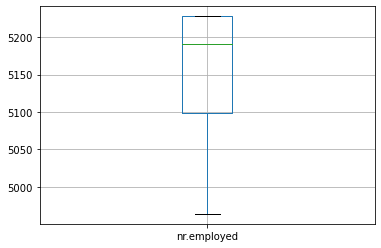

In [8]:
num_cols = list(df.describe().columns)

%matplotlib inline
for c in num_cols:
  print(c)
  df.boxplot(column=[c])
  plt.show()
  print()



    Age: We can see that for age, we have a range from late teens to late sixties, with outliers above that all the way upto the age of 100. However as this is with reason, these outliers don't need to be removed.

    for the call duration, we have a range of calls from 0 seconds all the way upto 700+ seconds for the majority of calls, with some outliers going all the way upto 5000 seconds. It should be noted however that while there is a very strong correlation between the length of the call and the final outcome, this specific feature corellation does not imply causation as a call with 0 seconds obviously implies 'no' and the result of any other call will be known during the call. - so this feature should not be used to build out model.

    campaign: We can see that the majority of people were contacted between 1 and 7 times, however we have a good number of outliers for this features, with the data indicating that some people were contacted almost 60 times. This may not seem realistic.

    pdays: most readings are at 999, which indicates that majority of clients were not contacted before(according to the data dictionary privided with the dataset). Due to the way this data is represented, with 999 indicating no previous attempt to contact, we may not be able to use this data or we may need to change it into a different form.

    previous: We can see that the majority of clients in this dataset were not contacted for other campaigns, while we have a sizable number of clients being contacted anywhere between 1 and 7 times for previous campaigns.

    Employment Variation Rate: This measures the employment variation rate for this cliennt. It varies from -3.5 to 1.5

    Consumer price index: This seems to be an indicator of the consumer price index and varies from around 92 to 95

    Consumer confidence index: this varies from -51 to -29 with a few outliers at roughly -26.

    Euribor 3 month rate varies between 0.5 and 5

    Number of employees- which varies between 4930 and 5240.

In [9]:
(df.y.value_counts()/41188)*100

no     88.734583
yes    11.265417
Name: y, dtype: float64

It seems that for our target column we have imbalanced data with 88.7% of the results being a 'no' and an 11.2% of the results being 'yes'

In [10]:
obj_cols = list(df.select_dtypes(include='object').columns)

print(obj_cols)
print()

for c in obj_cols:
  print(c)
  print(((df[c].value_counts()/41188)*100).round(2))
  print()

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

job
admin.           25.30
blue-collar      22.47
technician       16.37
services          9.64
management        7.10
retired           4.18
entrepreneur      3.54
self-employed     3.45
housemaid         2.57
unemployed        2.46
student           2.12
unknown           0.80
Name: job, dtype: float64

marital
married     60.52
single      28.09
divorced    11.20
unknown      0.19
Name: marital, dtype: float64

education
university.degree      29.54
high.school            23.10
basic.9y               14.68
professional.course    12.73
basic.4y               10.14
basic.6y                5.56
unknown                 4.20
illiterate              0.04
Name: education, dtype: float64

default
no         79.12
unknown    20.87
yes         0.01
Name: default, dtype: float64

housing
yes        52.38
no         45.21
unknown     2.40
Name: housing, dtype: float64

loan
no     

# Data distribution -checking for skewness

C:\Users\xcomr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


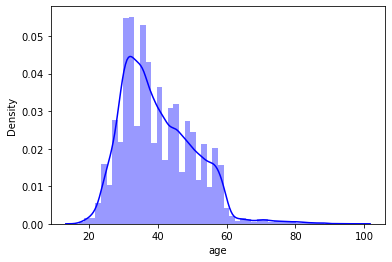

In [11]:
sns.distplot(df['age'],color="blue",hist=True);

C:\Users\xcomr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


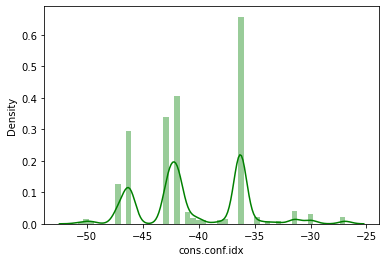

In [12]:
sns.distplot(df['cons.conf.idx'],color="green",hist=True);

C:\Users\xcomr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


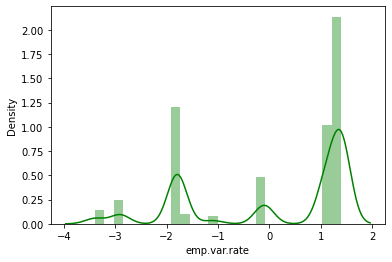

In [13]:
sns.distplot(df['emp.var.rate'],color="green",hist=True);

# Dropping biased columns and excluding outliers

In [14]:
def countplot_columns(columns):
    figure(figsize=(15,10))
    plot=sns.countplot(x=columns,data=df)
    total=len(df['y'])
    
    for p in plot.patches:
        
        plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()),size=15, xytext=(0,8),textcoords='offset points')
    plot.yaxis.set_ticks(np.linspace(0, total, 11))
    plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
    plt.show()

def countplot_target_varaible(columns,classes):
    figure(figsize=(15,10))
    total=len(df[classes])
    plot=sns.countplot(x=columns,data=df,hue=classes)
    for p in plot.patches:
        plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()),size=15, xytext=(0,8),textcoords='offset points')
    plot.yaxis.set_ticks(np.linspace(0, total, 11))
    plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
    plt.show()

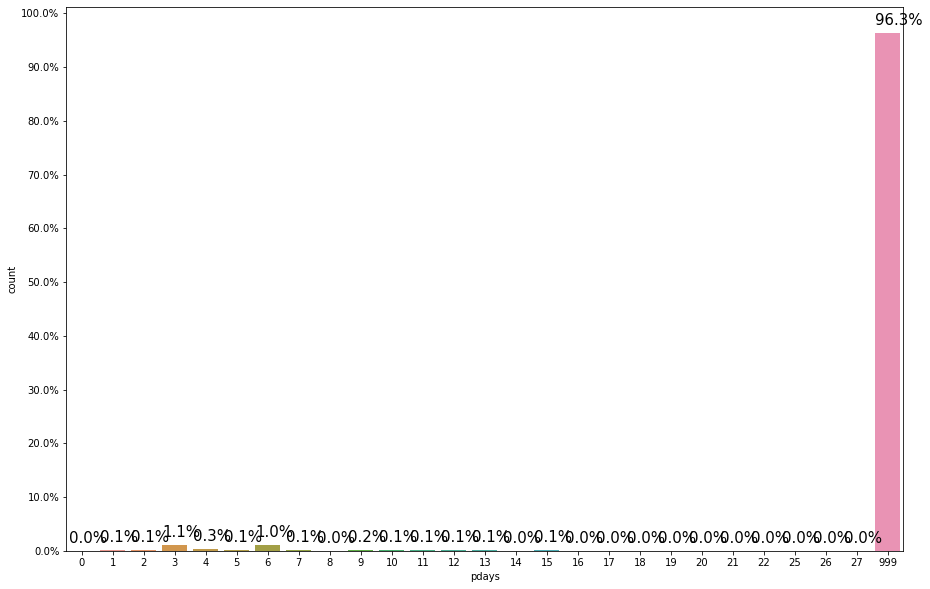

In [15]:
countplot_columns('pdays')

As it is shown above mainly all of the values are 999 which seems to be useless 

In [16]:
cleanseddf=df.drop(columns=['pdays'])
cleanseddf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Mapping all basic education to be basic only

In [17]:
cleanseddf["education"].replace({"basic.4y": "basic", "basic.6y": "basic","basic.9y":"basic"}, inplace=True)

Mapping age to groups

In [18]:
def age_to_categorical(data1,age):
    age_group=pd.cut(age,bins=[10,20,30,40,50,60,70,80,90,100],labels=['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100'])
    #inserting the age group after age and deleting it
    data1.insert(1,'age_group',age_group)
    #dropping age column
    data1.drop('age',axis=1,inplace=True)
    
    return data1
cleanseddf=age_to_categorical(cleanseddf,cleanseddf.age)
cleanseddf

,age_group,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,50-59,housemaid,married,basic,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,50-59,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,30-39,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,30-39,admin.,married,basic,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,50-59,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,70-79,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,40-49,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,50-59,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,40-49,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Mapping number of campaigns into groups

In [19]:
def campaign_groups(data2,campaign):
    campaign_group=pd.cut(campaign,bins=6,labels=['1-10','11-20','21-30','31-40','41-50','51-60'])
    #inserting the age group after age and deleting it
    data2.insert(12,'campaign_group',campaign_group)
    
    return data2
cleanseddf=campaign_groups(cleanseddf,cleanseddf.campaign)

In [20]:
cleanseddf.to_csv("Bank_cleansed.csv",index=False)

In [21]:
df_cleansed=pd.read_csv("Bank_cleansed.csv")
df_cleansed

,age_group,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,campaign_group,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,50-59,housemaid,married,basic,no,no,no,telephone,may,mon,...,1,1-10,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,50-59,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,1-10,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,30-39,services,married,high.school,no,yes,no,telephone,may,mon,...,1,1-10,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,30-39,admin.,married,basic,no,no,no,telephone,may,mon,...,1,1-10,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,50-59,services,married,high.school,no,no,yes,telephone,may,mon,...,1,1-10,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,70-79,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,1-10,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,40-49,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,1-10,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,50-59,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,1-10,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,40-49,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,1-10,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


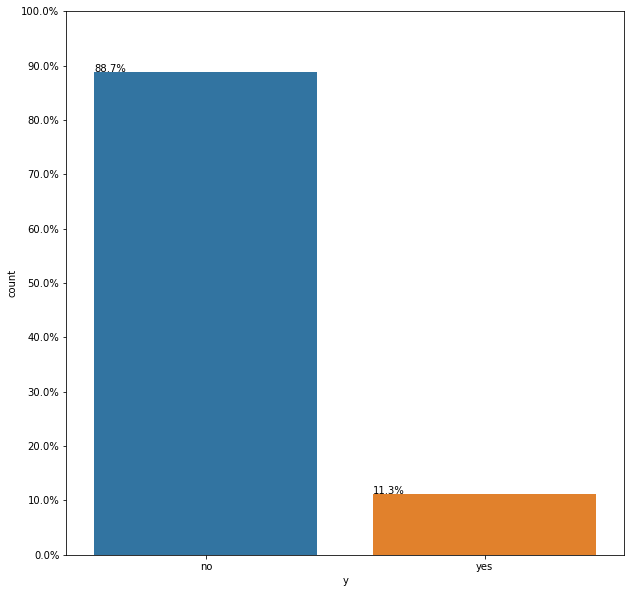

In [22]:
figure(figsize=(10,10))
total=len(df['y'])
plot=sns.countplot(x=df['y'],data=df)
for p in plot.patches:
    plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
plot.yaxis.set_ticks(np.linspace(0, total, 11))
plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
plt.show()

This plot shows th imbalance of the data

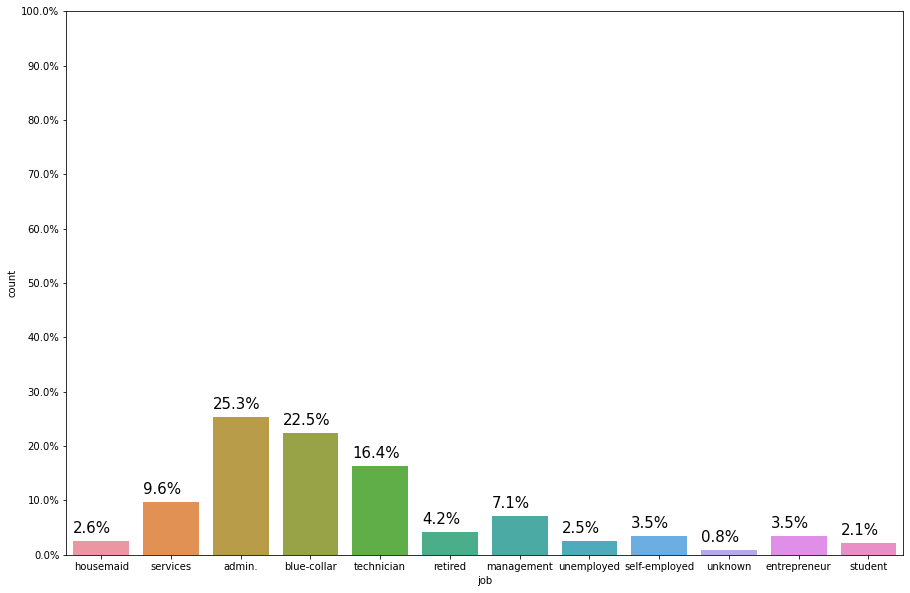

In [23]:
countplot_columns('job')

Admin, blue-colar and technicians were the most people contacted.

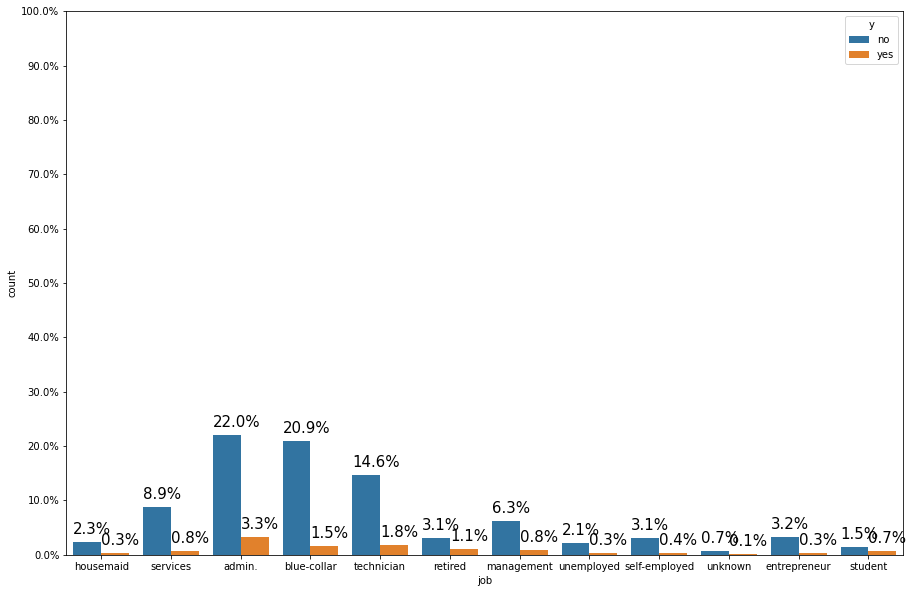

In [24]:
countplot_target_varaible('job','y')

Percantage of accepting the offer for each professional 

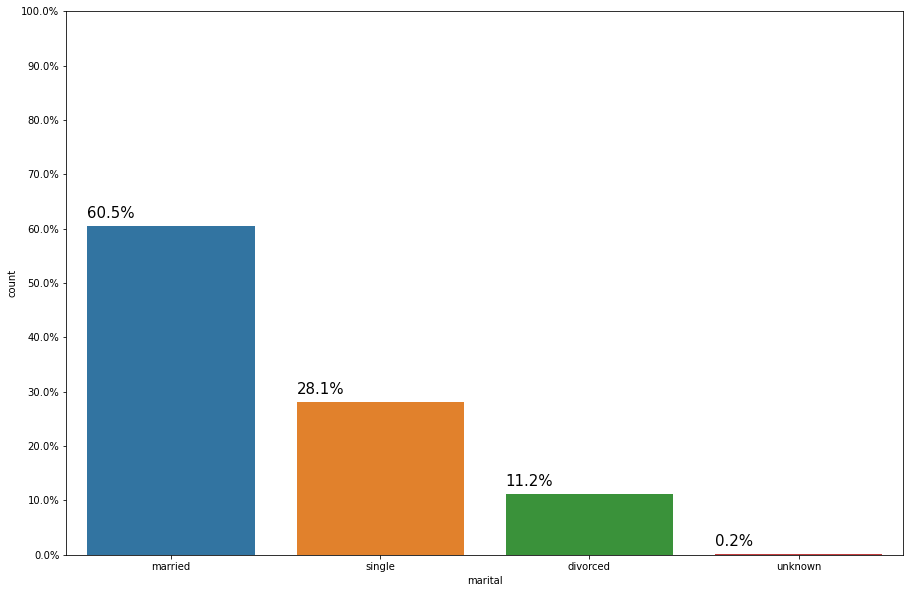

In [25]:
countplot_columns('marital')

Most of the clients were married

In [26]:
def plotting_kd(data,columns,hue=None):
    if hue==None:    
       plot=sns.FacetGrid(data,size=10).map(sns.distplot,columns)
    else:
        plot=sns.FacetGrid(data,hue=hue,size=10).map(sns.distplot,columns)
        plt.pyplot.legend()

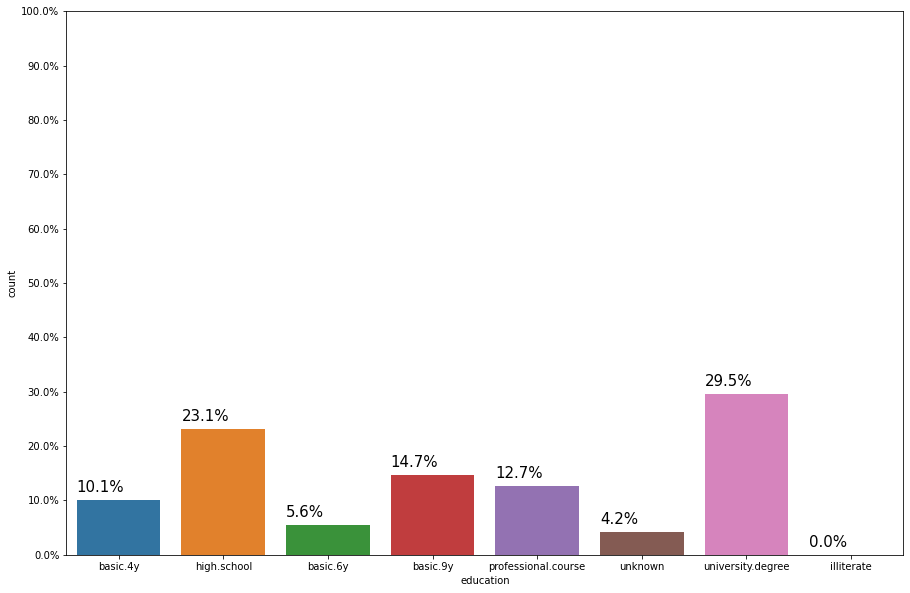

In [27]:
countplot_columns("education")

University graduates and basic education were the most contacted people

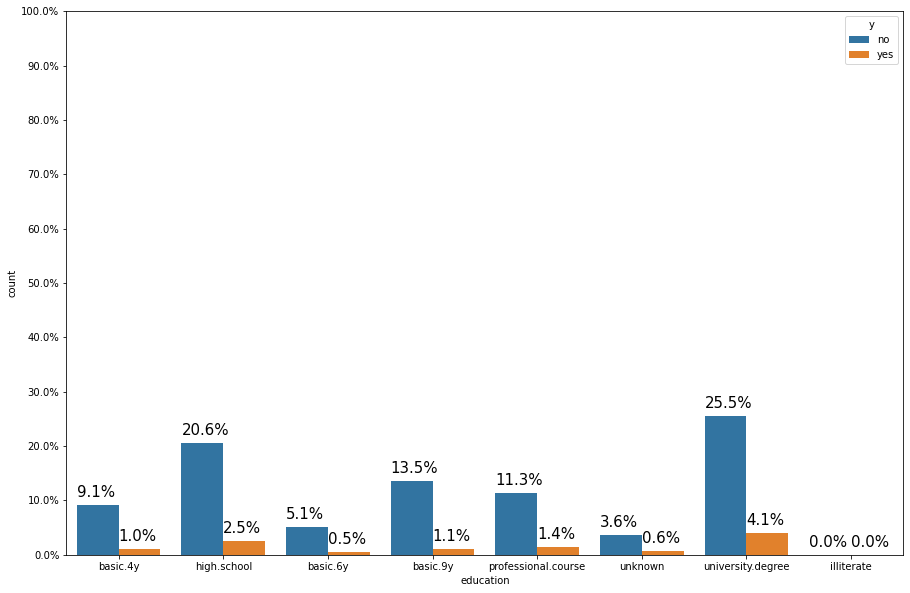

In [28]:
countplot_target_varaible("education","y")

University and basic graduates were the most people accepting the offer

In [29]:
def countplot_columns(columns):
    figure(figsize=(15,10))
    plot=sns.countplot(x=columns,data=df_cleansed)
    total=len(df_cleansed['y'])
    
    for p in plot.patches:
        
        plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()),size=15, xytext=(0,8),textcoords='offset points')
    plot.yaxis.set_ticks(np.linspace(0, total, 11))
    plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
    plt.show()

def countplot_target_varaible(columns,classes):
    figure(figsize=(15,10))
    total=len(df_cleansed[classes])
    plot=sns.countplot(x=columns,data=df_cleansed,hue=classes)
    for p in plot.patches:
        plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()),size=15, xytext=(0,8),textcoords='offset points')
    plot.yaxis.set_ticks(np.linspace(0, total, 11))
    plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
    plt.show()

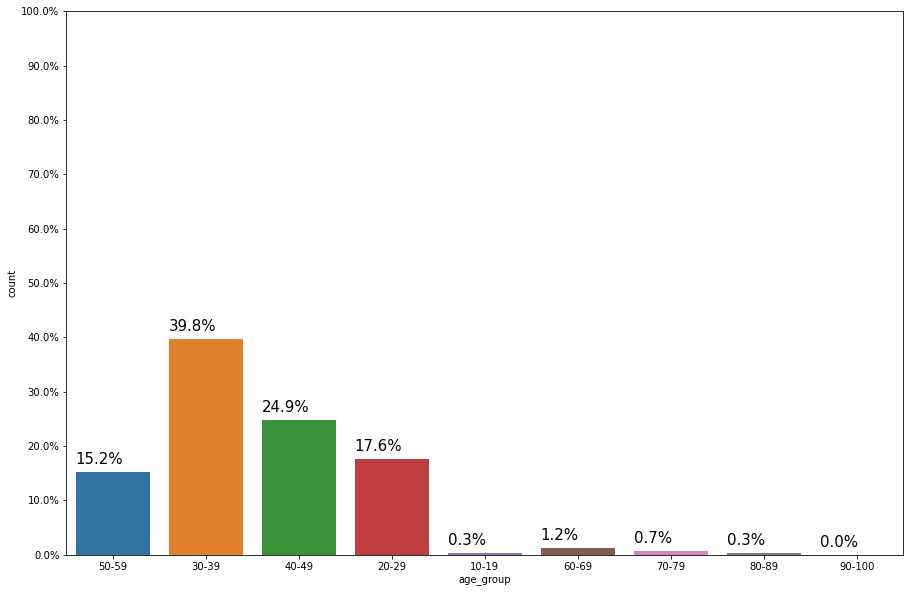

In [30]:
countplot_columns("age_group")

30-39 age group were the most targeted category

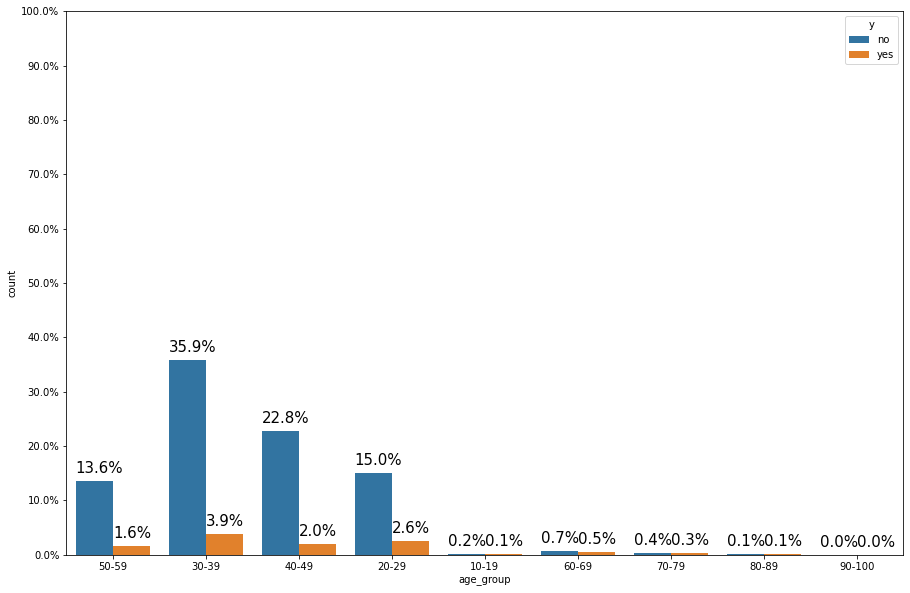

In [31]:
countplot_target_varaible("age_group","y")

Although 40-49 group were contacted more, yet 20-29 group subscribed more

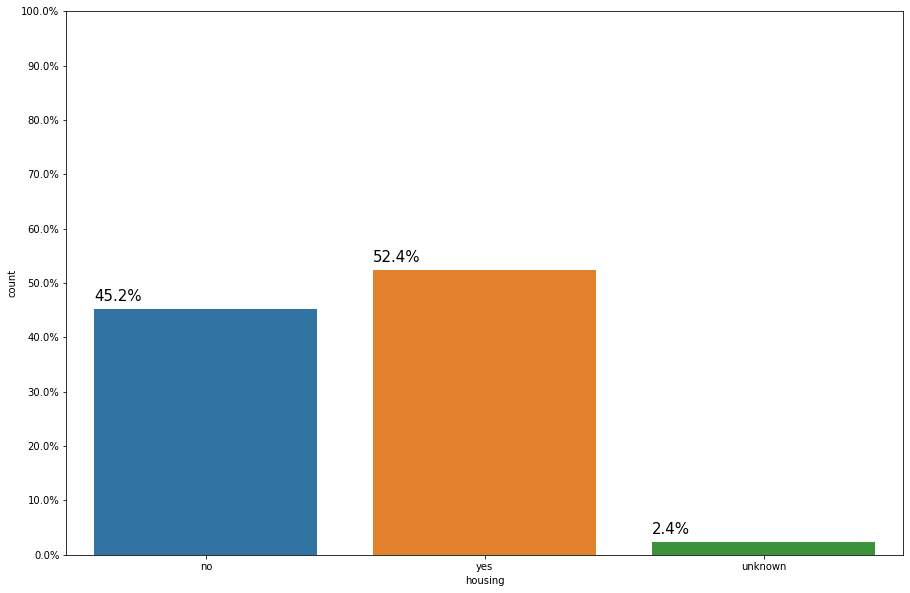

In [32]:
countplot_columns("housing")

People with houses were contacted more than others

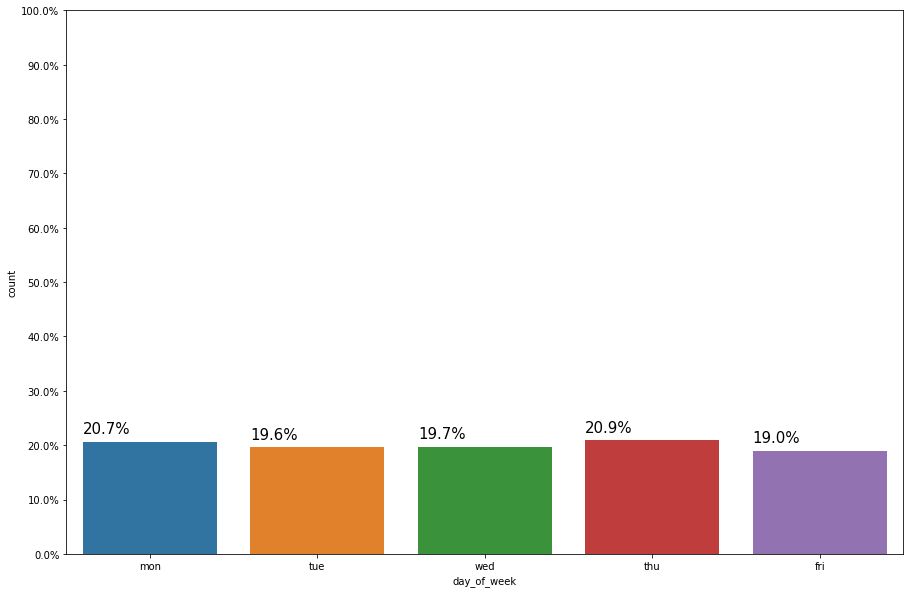

In [33]:
countplot_columns("day_of_week")

No contacts were made on weekends and contacts were mostly equal through the working days

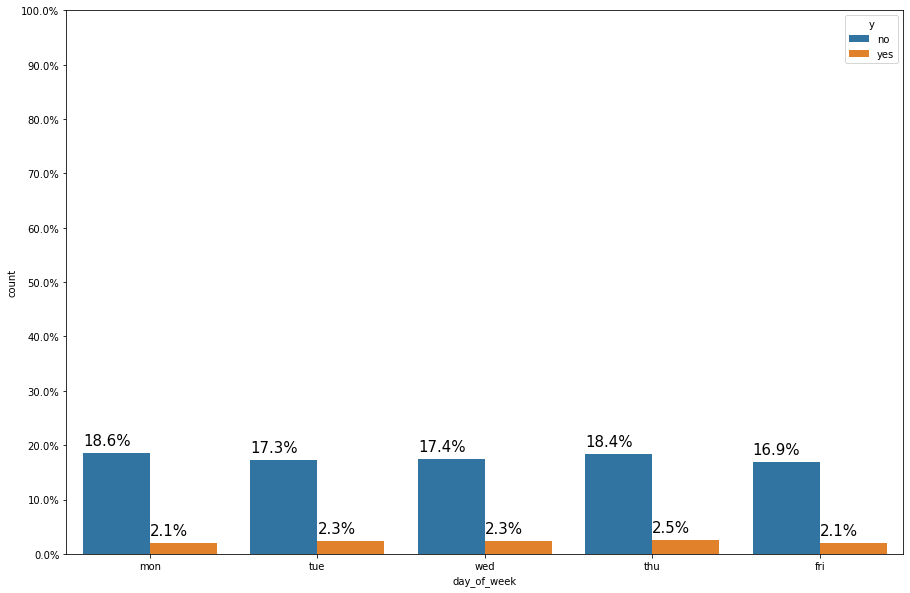

In [34]:
countplot_target_varaible("day_of_week","y")

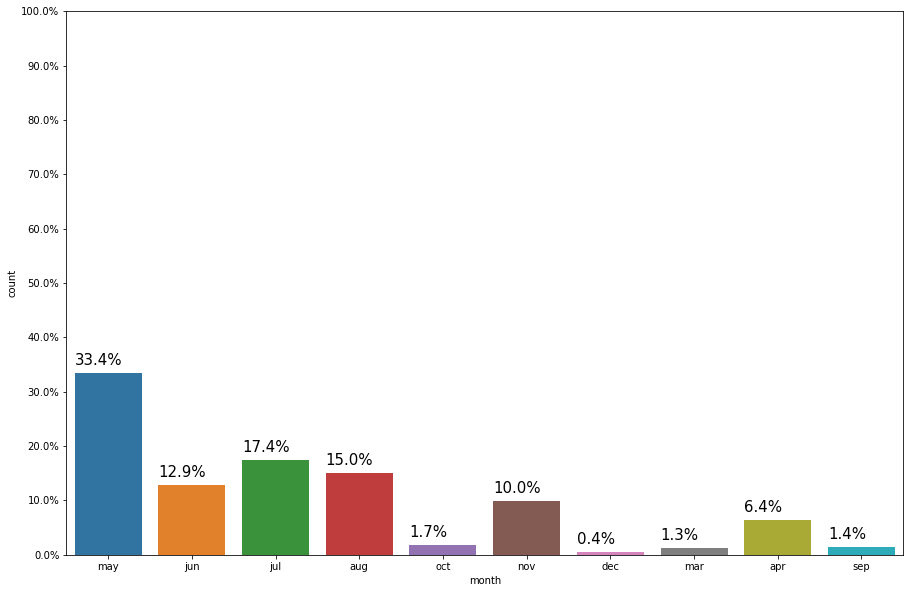

In [35]:
countplot_columns("month")

Summer was more crowded than rest of the year

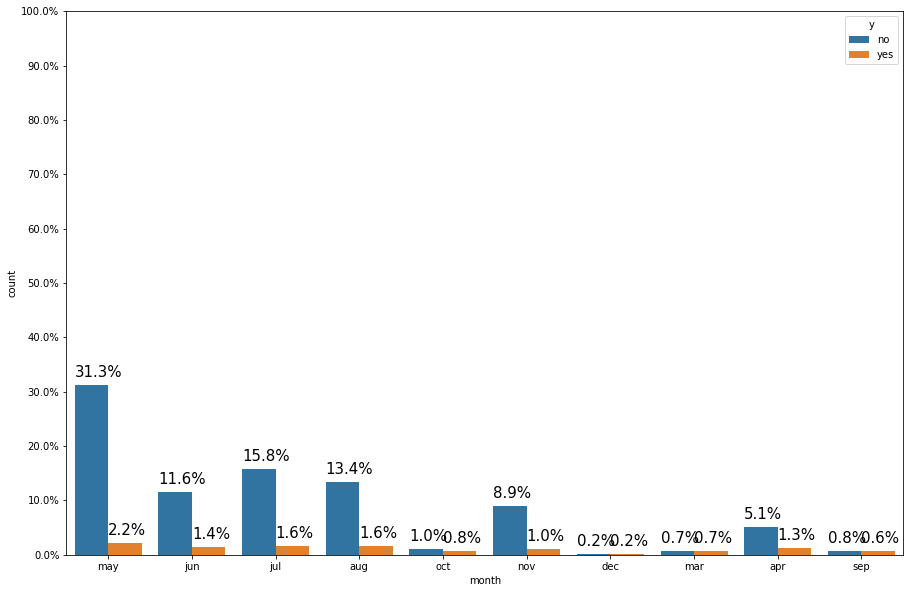

In [36]:
countplot_target_varaible('month','y')

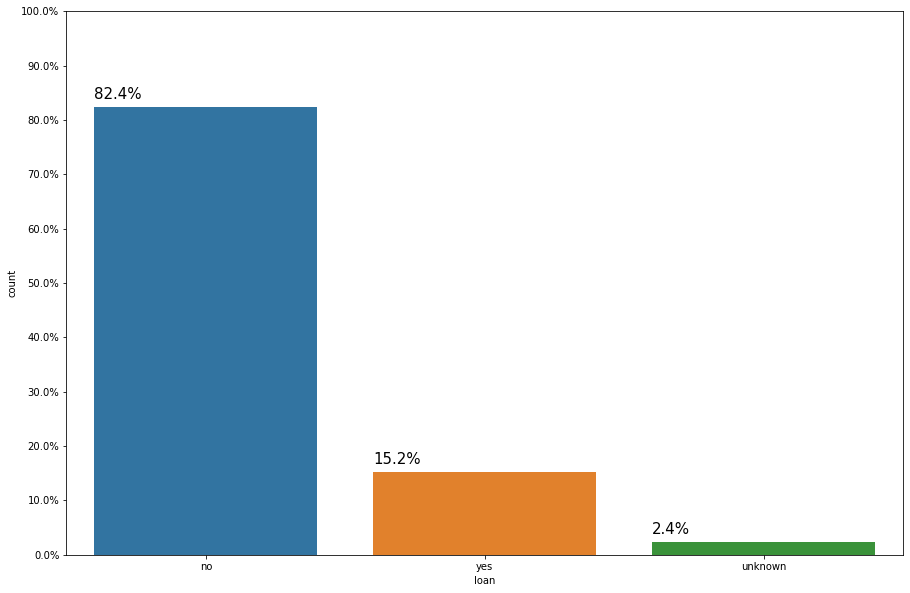

In [37]:
countplot_columns('loan')

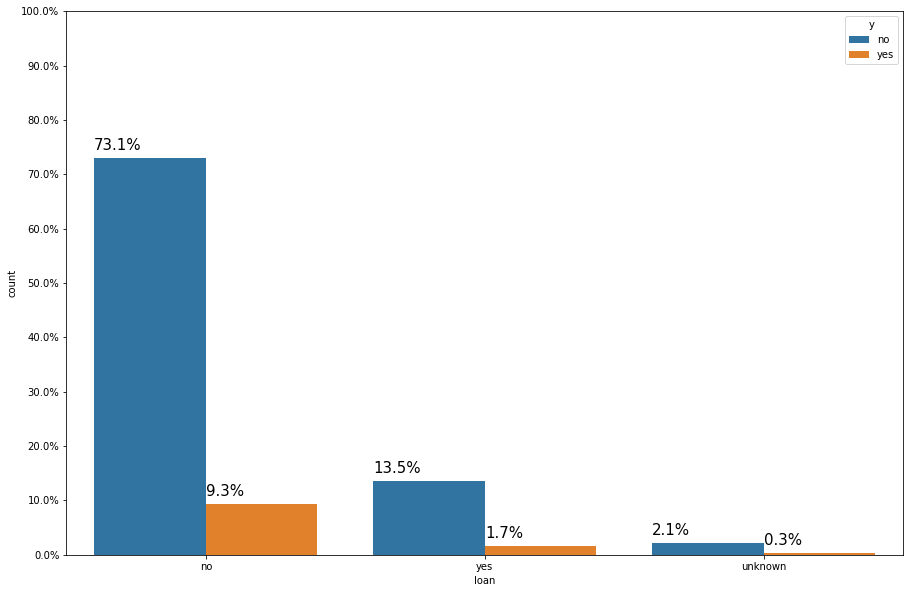

In [38]:
countplot_target_varaible('loan','y')

People without loans were contacted more since they do not have bank commitments

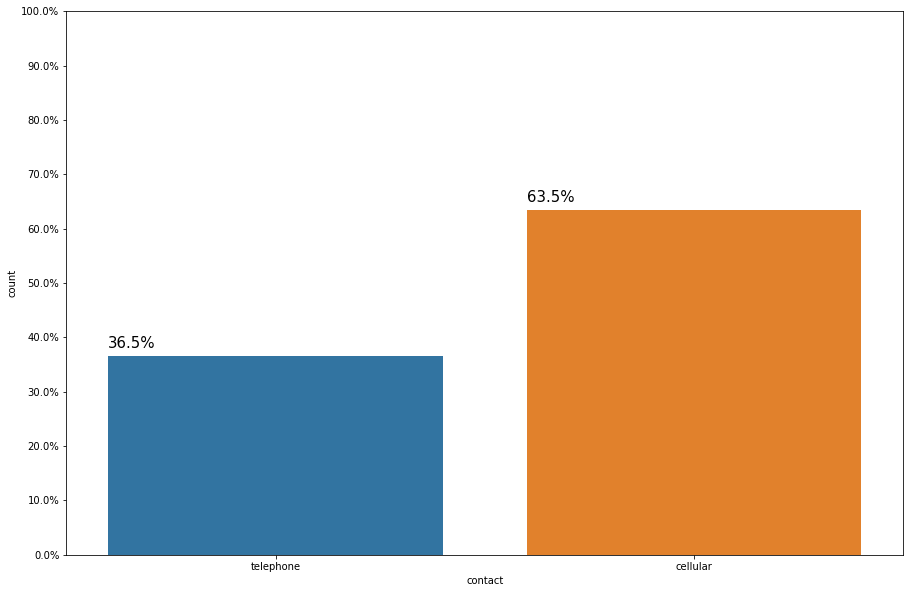

In [39]:
countplot_columns("contact")

Contact was through cellular more than telephone

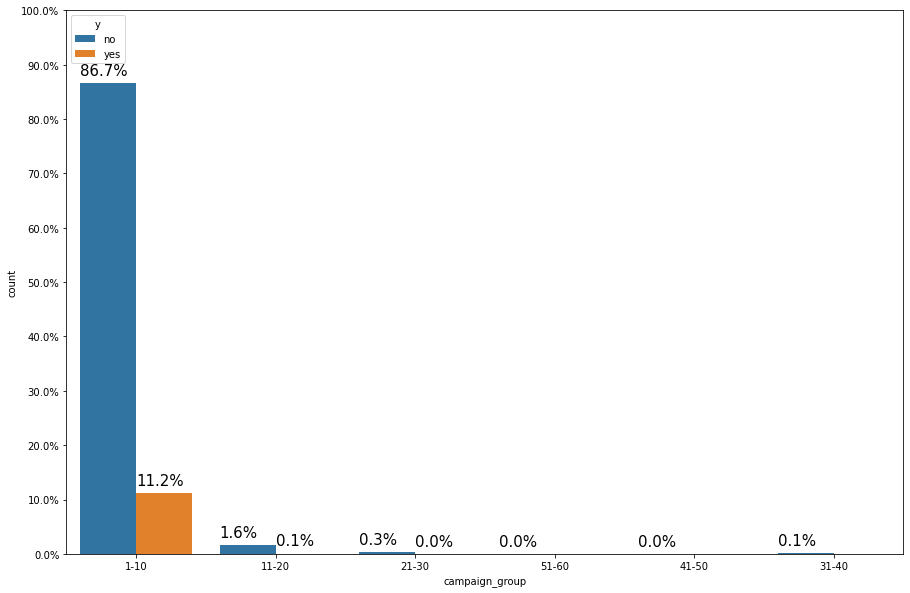

In [40]:
countplot_target_varaible("campaign_group","y")

Most customers were contacted between 1 and 10 times and 11.2% subscribed during the campaigns

C:\Users\xcomr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Comaprison of employability and Consumer confidence index'}, xlabel='cons.conf.idx', ylabel='emp.var.rate'>

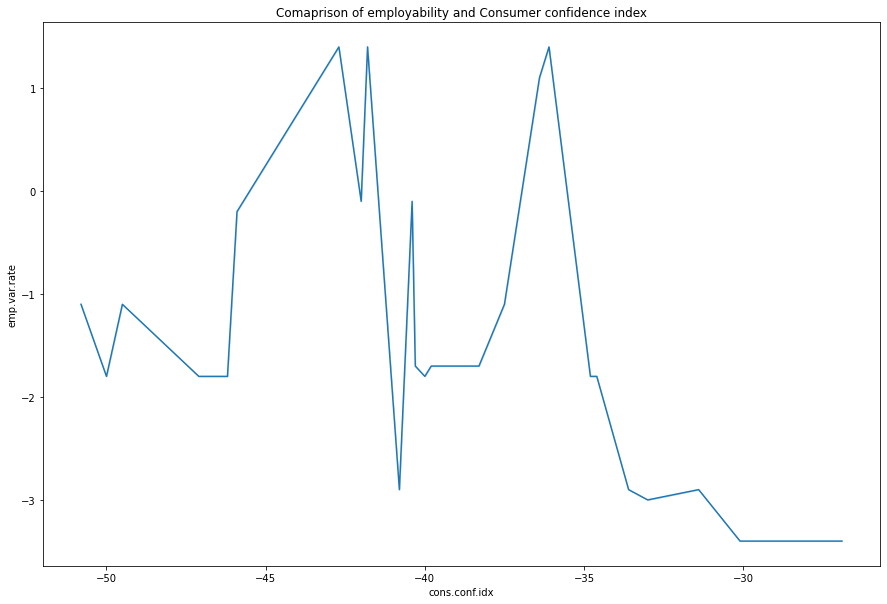

In [41]:
figure(figsize=(15,10))
plt.title('Comaprison of employability and Consumer confidence index')
sns.lineplot('cons.conf.idx','emp.var.rate', data =df,palette='inferno')

There is an immediate increase and decrease of how customers are likely to spend, that is particularly for the term deposit,those who do not have a stable source of income are likely not to take the offer unlike those who have a stbale income.

C:\Users\xcomr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Comaprison of employability and Consumer price index'}, xlabel='cons.price.idx', ylabel='emp.var.rate'>

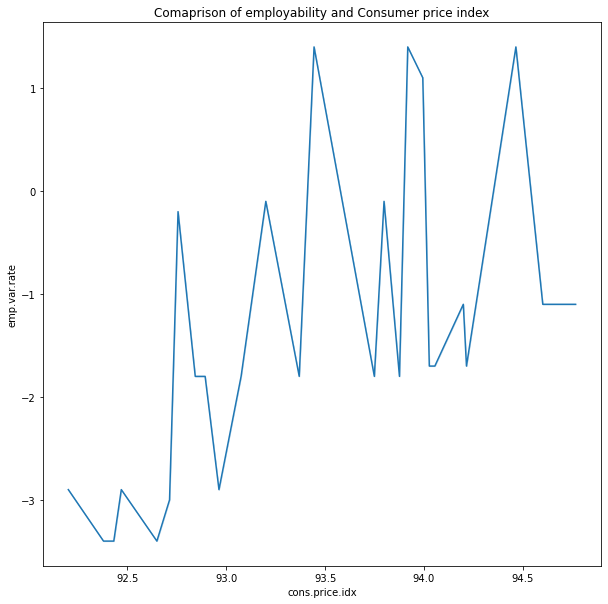

In [42]:
fig=figure(figsize=(10,10))
plt.title('Comaprison of employability and Consumer price index')
sns.lineplot('cons.price.idx','emp.var.rate', data =df)

An index of 110 means that there's been a 10% rise in the price of the market basket and 90% indicates a 10% decrease in the price of the market basket.There seems to be a positive correlation between the two variables

C:\Users\xcomr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Comparison of campaigns and Consumer price index'}, xlabel='cons.price.idx', ylabel='campaign'>

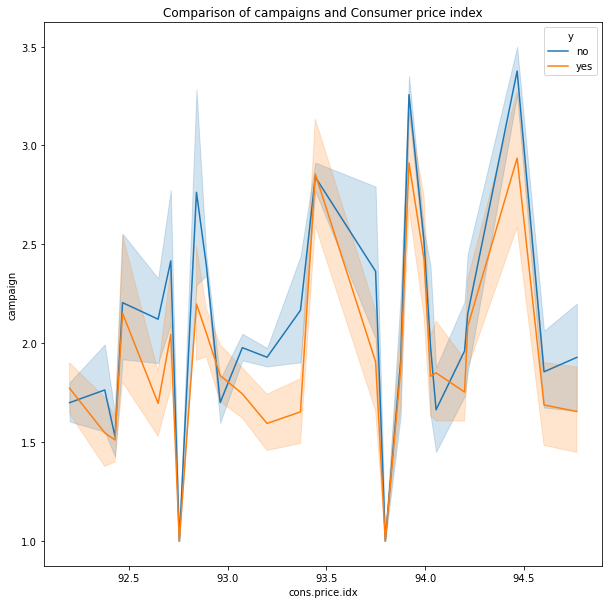

In [43]:
fig=plt.figure(figsize=(10,10))
plt.title('Comparison of campaigns and Consumer price index')
sns.lineplot('cons.price.idx','campaign', data =df, hue='y')

C:\Users\xcomr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Comparison of employabililty and number of successful campaigns'}, xlabel='emp.var.rate', ylabel='campaign'>

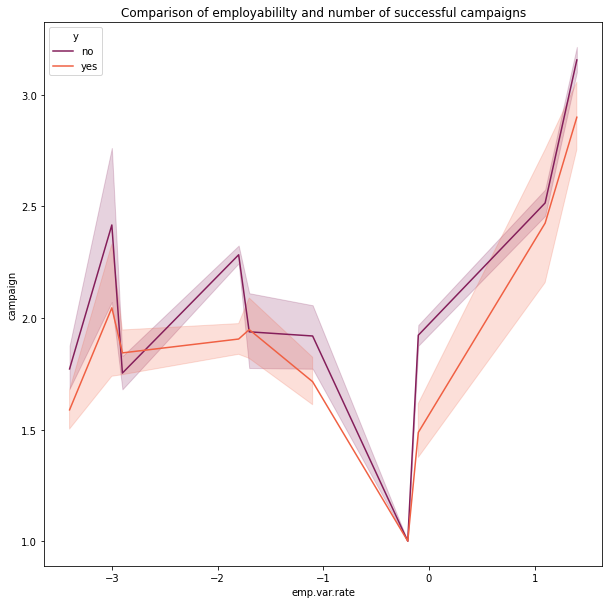

In [44]:
fig=plt.figure(figsize=(10,10))
plt.title('Comparison of employabililty and number of successful campaigns')
sns.lineplot('emp.var.rate','campaign', data =df, hue='y',palette='rocket')

We can clearly say that when the employability rate was at a zero(not many people having jobs) the number of successful campaigns were low. However when the rate changes to 1 which is a positive rate the customers subscribing to the term deposit are high.

C:\Users\xcomr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Comaprison of employability and the months'}, xlabel='month', ylabel='emp.var.rate'>

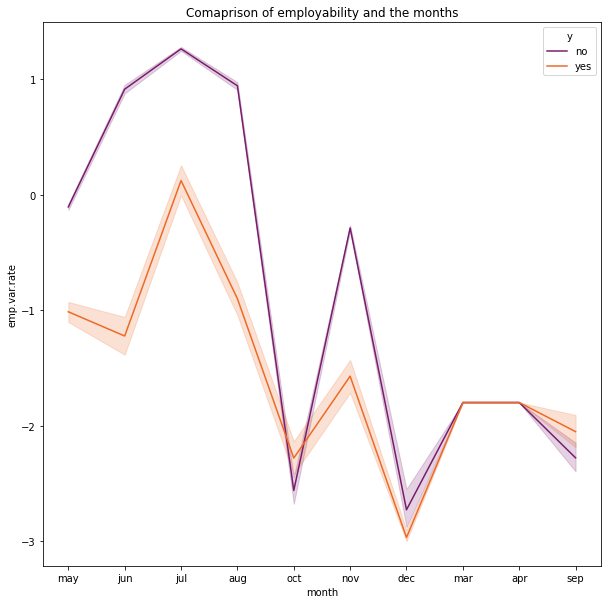

In [45]:
fig=plt.figure(figsize=(10,10))
plt.title('Comaprison of employability and the months')
sns.lineplot('month','emp.var.rate', data =df, hue='y',palette='inferno')

There was a stagnancy in March and April of those who took the term deposit. December had the lowest rate of employability and majority did not take the term deposit. However betwwen May and July the numbers were quite high with July being the highest peak for the people who took the term deposit but it can still be noted that although the three months were good for the customers majority did not subscribe for a term deposit.

C:\Users\xcomr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'The outcomes of the campaigns'}, xlabel='poutcome', ylabel='duration'>

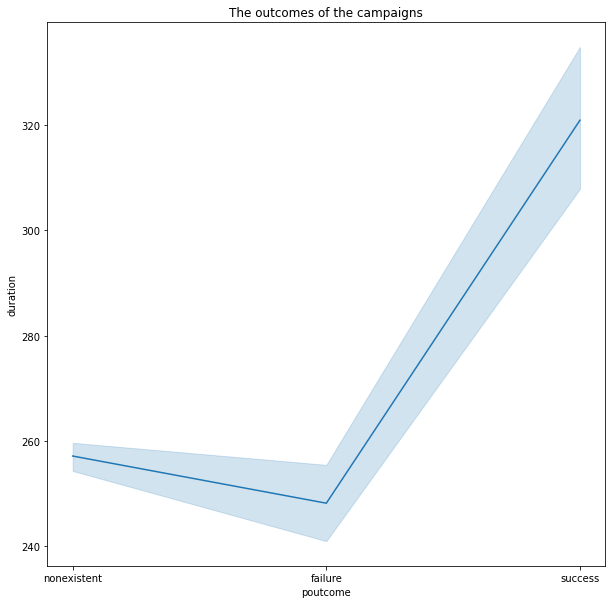

In [46]:
fig=plt.figure(figsize=(10,10))
plt.title('The outcomes of the campaigns')
sns.lineplot('poutcome','duration', data =df)

The campaigns that were successful were the ones that had a long call duration

C:\Users\xcomr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Employability determing the outcome of campaigns'}, xlabel='poutcome', ylabel='emp.var.rate'>

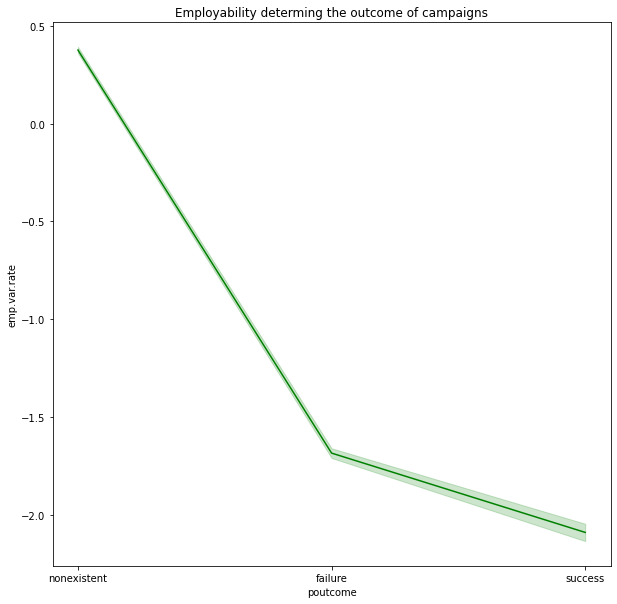

In [47]:
fig=plt.figure(figsize=(10,10))
plt.title('Employability determing the outcome of campaigns')
sns.lineplot('poutcome','emp.var.rate', data =df,color='green')

C:\Users\xcomr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'CCI determing the outcome of campaigns'}, xlabel='poutcome', ylabel='cons.conf.idx'>

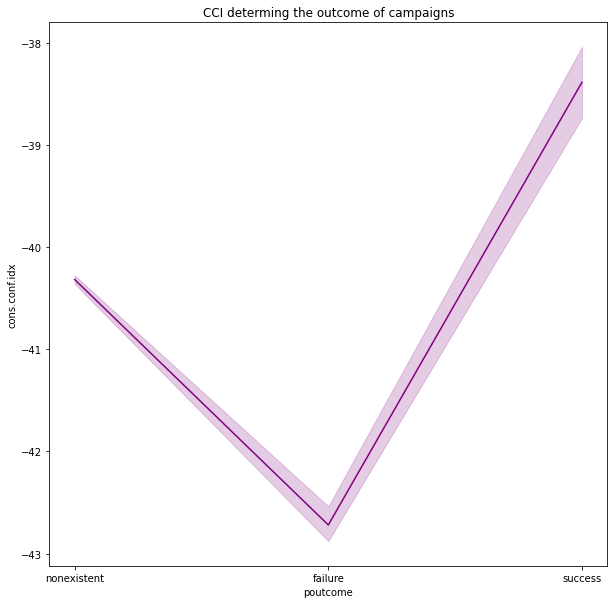

In [48]:
fig=plt.figure(figsize=(10,10))
plt.title('CCI determing the outcome of campaigns')
sns.lineplot('poutcome','cons.conf.idx', data =df,color='purple')

C:\Users\xcomr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'CPI determing the outcome of campaigns'}, xlabel='poutcome', ylabel='cons.price.idx'>

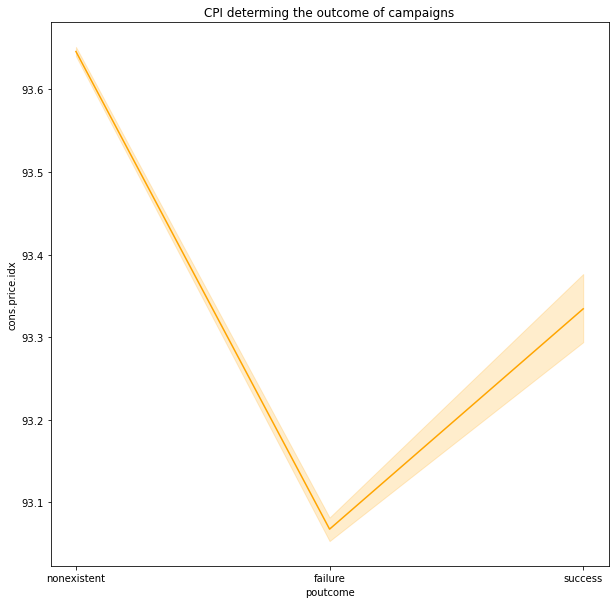

In [49]:
fig=plt.figure(figsize=(10,10))
plt.title('CPI determing the outcome of campaigns')
sns.lineplot('poutcome','cons.price.idx', data =df,color='orange')

C:\Users\xcomr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


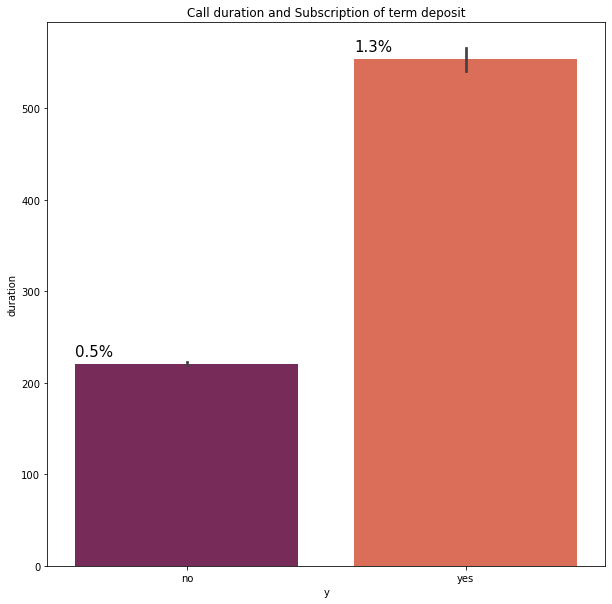

In [50]:
yes=len(df['y'])
fig=plt.figure(figsize=(10,10))
plot=sns.barplot('y','duration', data =df,palette='rocket')
for y in plot.patches:
  plt.title('Call duration and Subscription of term deposit')
  plot.annotate('{:.1f}%'.format(100*y.get_height()/yes),(y.get_x(),y.get_height()),size=15, xytext=(0,8),textcoords='offset points')

A long call duration has been a factor to influence those who had subscribed for a term deposit , this is accounted by 1.3%

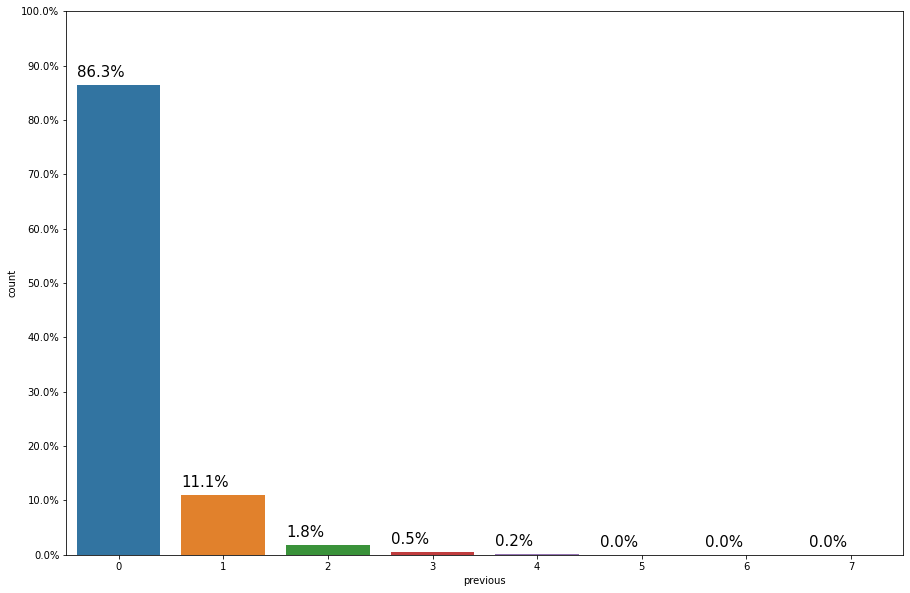

In [51]:
countplot_columns('previous')

Many customers who had never been contacted actually are the highest.

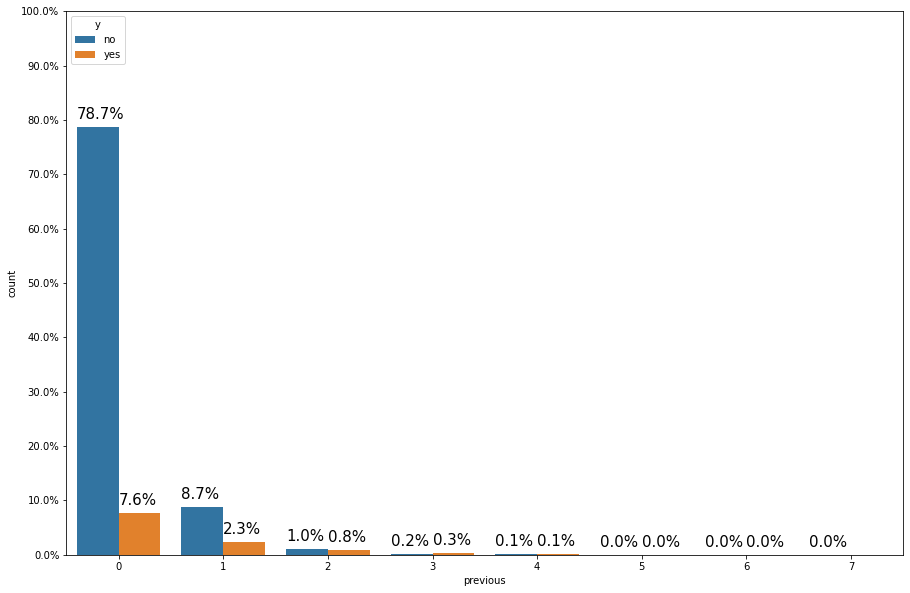

In [52]:
countplot_target_varaible("previous","y")

In [53]:
### New customers were mostly targeted and had the highest rate of accepting the term deposit

In [54]:
df_cleansed['age_group']=df['age']

In [55]:
df_cleansed

,age_group,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,campaign_group,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,...,1,1-10,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,1-10,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,1-10,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic,no,no,no,telephone,may,mon,...,1,1-10,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,1-10,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,1-10,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,1-10,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,1-10,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,1-10,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [56]:
df_cleansed=df_cleansed.drop(['poutcome', 'campaign_group'], axis=1)

In [57]:
df_cleansed

,age_group,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,261,1,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic,no,no,no,telephone,may,mon,151,1,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,-1.1,94.767,-50.8,1.028,4963.6,yes


In [58]:
from sklearn.preprocessing import LabelEncoder
encod=LabelEncoder()
df_cleansed['housing']=encod.fit_transform(df['housing'])
df_cleansed['loan']=encod.fit_transform(df['loan'])
df_cleansed['day_of_week']=encod.fit_transform(df['day_of_week'])
df_cleansed['marital']=encod.fit_transform(df['marital'])
df_cleansed['y']=encod.fit_transform(df['y'])
df_cleansed['month']=encod.fit_transform(df['month'])
df_cleansed['education']=encod.fit_transform(df['education'])
df_cleansed['default']=encod.fit_transform(df['default'])
df_cleansed['job']=encod.fit_transform(df['job'])
df_cleansed['contact']=encod.fit_transform(df['contact'])

<AxesSubplot:>

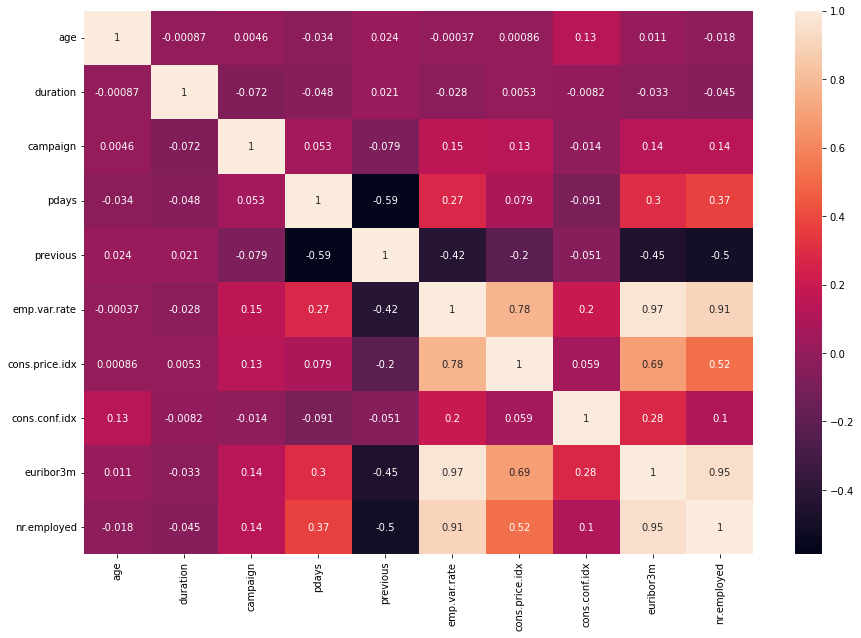

In [59]:
correlation=df.corr()
fig=plt.figure(figsize=(15,10))
        
        
sns.heatmap(correlation, annot=True)

In [60]:
df_cleansed

,age_group,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,383,1,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,189,2,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,442,1,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [61]:
#Excluding highly correlated features

In [62]:
X = df_cleansed[['age_group','duration','euribor3m','cons.price.idx','cons.conf.idx','housing','job','marital','day_of_week','previous','education']]
#X=df_cleansed[['age_group','duration','euribor3m','cons.price.idx','campaign','cons.conf.idx']]
y = df_cleansed.iloc[:,-1]


In [63]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
def prepare_inputs(X_train, X_test):
	ohe = OneHotEncoder()
	ohe.fit(X_train)
	X_train_enc = ohe.transform(X_train)
	X_test_enc = ohe.transform(X_test)
	return X_train_enc, X_test_enc
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [64]:
#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=25)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [66]:
from imblearn.pipeline import Pipeline
over = over_sampling.SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
x_final,y_final=pipeline.fit_resample(X_train,y_train)
print("After oversampling: ",Counter(y_final))

After oversampling:  Counter({0: 20897, 1: 14628})


In [67]:
# Model 1 LogisticRegression

In [68]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sn
from sklearn import metrics

In [69]:

model1 = LogisticRegression(solver='lbfgs', max_iter=5000)
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over), ('u', under), ('model1', model1)]
pipeline = Pipeline(steps=steps)
#print("After oversampling: ",Counter(y_final))

In [70]:
pipeline.fit(X_train,y_train)
log=pipeline.predict(X_test)

Accuracy:  0.855668851663025


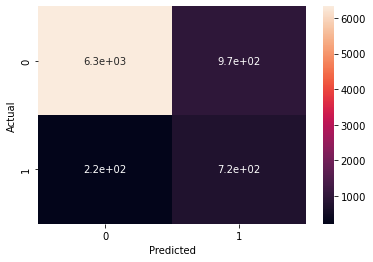

In [71]:
import seaborn as sn
from sklearn import metrics
#y_pred=logistic_regression.predict(X_test)
confusion_matrix = pd.crosstab(y_test, log, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, log))
plt.show()

In [72]:
#Model 2 Random forest

In [73]:
model2 = RandomForestClassifier()
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over), ('u', under), ('model2', model2)]
pipeline2= Pipeline(steps=steps)
#print("After oversampling: ",Counter(y_final))

In [74]:
pipeline2.fit(X_train,y_train)
Rand=pipeline2.predict(X_test)

Accuracy:  0.9042243262927895


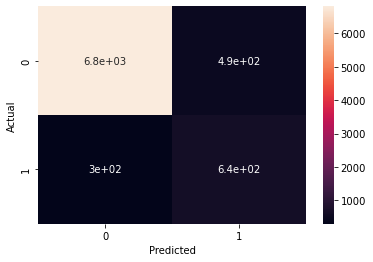

In [75]:
import seaborn as sn
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, Rand, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, Rand))
plt.show()

In [76]:
# Gradient boost classifier

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
model3 = GradientBoostingClassifier()
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over), ('u', under), ('model3', model3)]
pipeline3= Pipeline(steps=steps)
#print("After oversampling: ",Counter(y_final))

In [78]:
pipeline3.fit(X_train,y_train)
Grad=pipeline3.predict(X_test)

Accuracy:  0.890507404709881


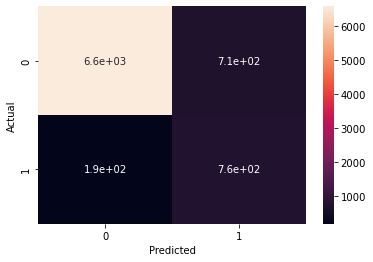

In [79]:

confusion_matrix = pd.crosstab(y_test, Grad, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, Grad))
plt.show()

In [80]:
# Ada boost model

In [81]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.svm import SVC
# from sklearn import metrics
# svc=SVC(probability=True, kernel='linear')

# # Create adaboost classifer object
# model4 =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# # Train Adaboost Classifer
# #model4 = abc.fit(X_train, y_train)
# over = SMOTE(sampling_strategy=0.5)
# under = RandomUnderSampler(sampling_strategy=0.7)
# steps = [('o', over), ('u', under), ('model4', model4)]
# pipeline4= Pipeline(steps=steps)

In [82]:
# pipeline4.fit(X_train,y_train)
# # ADA=pipeline4.predict(X_test)

In [83]:
# confusion_matrix = pd.crosstab(y_test, ADA, rownames=['Actual'], colnames=['Predicted'])
# sn.heatmap(confusion_matrix, annot=True)
# print('Accuracy: ',metrics.accuracy_score(y_test, ADA))
# plt.show()

In [84]:
#Xgboost

In [87]:
import xgboost as xgb
model5 = xgb.XGBClassifier()
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over), ('u', under), ('model5', model5)]
pipeline5= Pipeline(steps=steps)

In [88]:
pipeline5.fit(X_train,y_train)
Xg=pipeline5.predict(X_test)

C:\Users\xcomr\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:03:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy:  0.9058023792182569


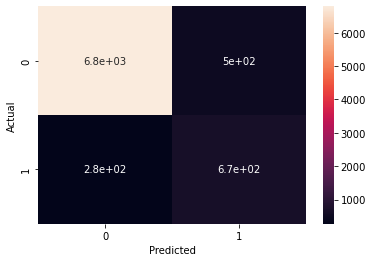

In [89]:
confusion_matrix = pd.crosstab(y_test, Xg, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, Xg))
plt.show()

In [90]:
#  DecisionTree Classifier

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
# Models without duration feature
model6 = DecisionTreeClassifier(criterion="entropy", max_depth=10)
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over), ('u', under), ('model6', model6)]
pipeline6= Pipeline(steps=steps)

In [93]:
pipeline6.fit(X_train,y_train)
Dc=pipeline6.predict(X_test)

Accuracy:  0.8885651857246905


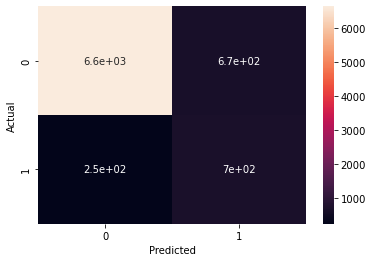

In [94]:
confusion_matrix = pd.crosstab(y_test, Dc, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, Dc))
plt.show()

In [95]:
data={'models':['Logistic Regression','Random forest','Gradient boost','Xgboost','Decision Tree'],
'values':[metrics.accuracy_score(y_test, log),metrics.accuracy_score(y_test, Rand),metrics.accuracy_score(y_test, Grad),metrics.accuracy_score(y_test, Xg),metrics.accuracy_score(y_test, Dc)]}
data


{'models': ['Logistic Regression',
  'Random forest',
  'Gradient boost',
  'Xgboost',
  'Decision Tree'],
 'values': [0.855668851663025,
  0.9042243262927895,
  0.890507404709881,
  0.9058023792182569,
  0.8885651857246905]}

<function matplotlib.pyplot.show(close=None, block=None)>

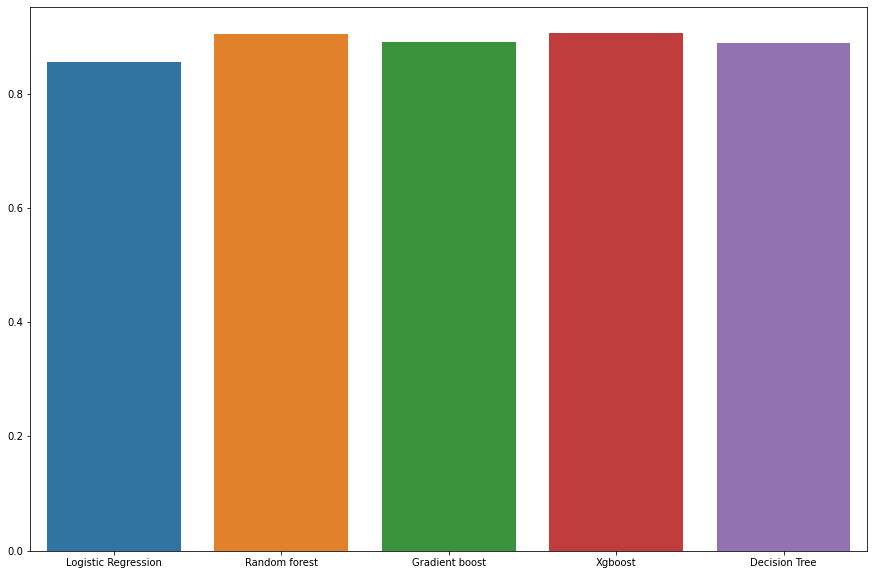

In [96]:
figure(figsize=(15,10))
sns.barplot(x='models',y='values',data=data)
plt.show

In [97]:
X2 = df_cleansed[['age_group','euribor3m','cons.price.idx','cons.conf.idx','housing','job','marital','day_of_week','education']]
#X=df[['age_group','duration','euribor3m','cons.price.idx','campaign','cons.conf.idx']]
y2 = df_cleansed.iloc[:,-1]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size=0.20,random_state=1)

In [99]:
#LogisticRegression

In [100]:
model1 = LogisticRegression(solver='lbfgs', max_iter=5000)
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over), ('u', under), ('model1', model1)]
pipeline = Pipeline(steps=steps)
#print("After oversampling: ",Counter(y_final)

In [101]:
pipeline.fit(X_train,y_train)
log=pipeline.predict(X_test)

Accuracy:  0.7651128914785142


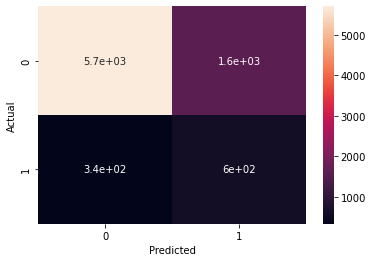

In [102]:
import seaborn as sn
from sklearn import metrics
#y_pred=logistic_regression.predict(X_test)
confusion_matrix = pd.crosstab(y_test, log, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, log))
plt.show()

In [103]:
#RandomForestClassifier

In [104]:
model2 = RandomForestClassifier()
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over), ('u', under), ('model2', model2)]
pipeline2= Pipeline(steps=steps)
#print("After oversampling: ",Counter(y_final))

In [105]:
pipeline2.fit(X_train,y_train)
Rand=pipeline2.predict(X_test)

Accuracy:  0.8587035688273853


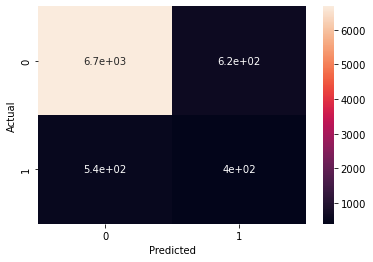

In [106]:
confusion_matrix = pd.crosstab(y_test, Rand, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, Rand))
plt.show()

In [107]:
#GradientBoostingClassifier

In [108]:
model3 = GradientBoostingClassifier()
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over), ('u', under), ('model3', model3)]
pipeline3= Pipeline(steps=steps)

In [109]:
pipeline3.fit(X_train,y_train)
Grad=pipeline3.predict(X_test)

Accuracy:  0.8702354940519543


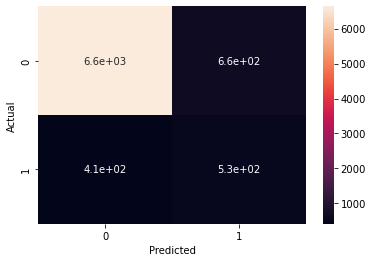

In [110]:
confusion_matrix = pd.crosstab(y_test, Grad, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, Grad))
plt.show()

In [111]:
# AdaBoostClassifier

In [112]:
# svc=SVC(probability=True, kernel='linear')

# # Create adaboost classifer object
# model4 =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# # Train Adaboost Classifer
# #model4 = abc.fit(X_train, y_train)
# over = SMOTE(sampling_strategy=0.5)
# under = RandomUnderSampler(sampling_strategy=0.7)
# steps = [('o', over), ('u', under), ('model4', model4)]
# pipeline4= Pipeline(steps=steps)

In [113]:
# pipeline4.fit(X_train,y_train)
# ADA=pipeline4.predict(X_test)

In [114]:
# confusion_matrix = pd.crosstab(y_test, ADA, rownames=['Actual'], colnames=['Predicted'])
# sn.heatmap(confusion_matrix, annot=True)
# print('Accuracy: ',metrics.accuracy_score(y_test, ADA))
# plt.show()

In [115]:
#Xgboost

In [116]:
import xgboost as xgb

#xgb_cl = xgb.XGBClassifier()

In [117]:
model5 = xgb.XGBClassifier()
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over), ('u', under), ('model5', model5)]
pipeline5= Pipeline(steps=steps)

In [118]:
pipeline5.fit(X_train,y_train)
Xg=pipeline5.predict(X_test)

C:\Users\xcomr\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:03:58] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy:  0.876062151007526


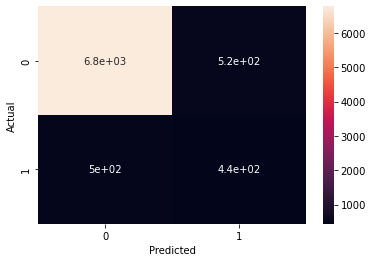

In [119]:
confusion_matrix = pd.crosstab(y_test, Xg, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, Xg))
plt.show()

In [120]:
model6 = DecisionTreeClassifier(criterion="entropy", max_depth=10)
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over), ('u', under), ('model6', model6)]
pipeline6= Pipeline(steps=steps)

In [121]:
pipeline6.fit(X_train,y_train)
Dc=pipeline6.predict(X_test)

Accuracy:  0.8761835396941005


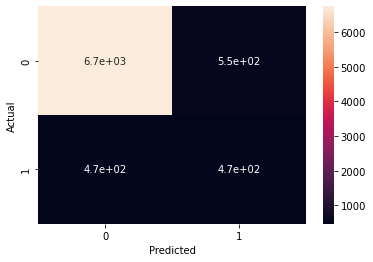

In [122]:
confusion_matrix = pd.crosstab(y_test, Dc, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, Dc))
plt.show()

In [123]:
data={'models':['Logistic Regression','Random forest','Gradient boost','Xgboost','Decision Tree'],
'values':[metrics.accuracy_score(y_test, log),metrics.accuracy_score(y_test, Rand),metrics.accuracy_score(y_test, Grad),metrics.accuracy_score(y_test, Xg),metrics.accuracy_score(y_test, Dc)]}
data

{'models': ['Logistic Regression',
  'Random forest',
  'Gradient boost',
  'Xgboost',
  'Decision Tree'],
 'values': [0.7651128914785142,
  0.8587035688273853,
  0.8702354940519543,
  0.876062151007526,
  0.8761835396941005]}

<function matplotlib.pyplot.show(close=None, block=None)>

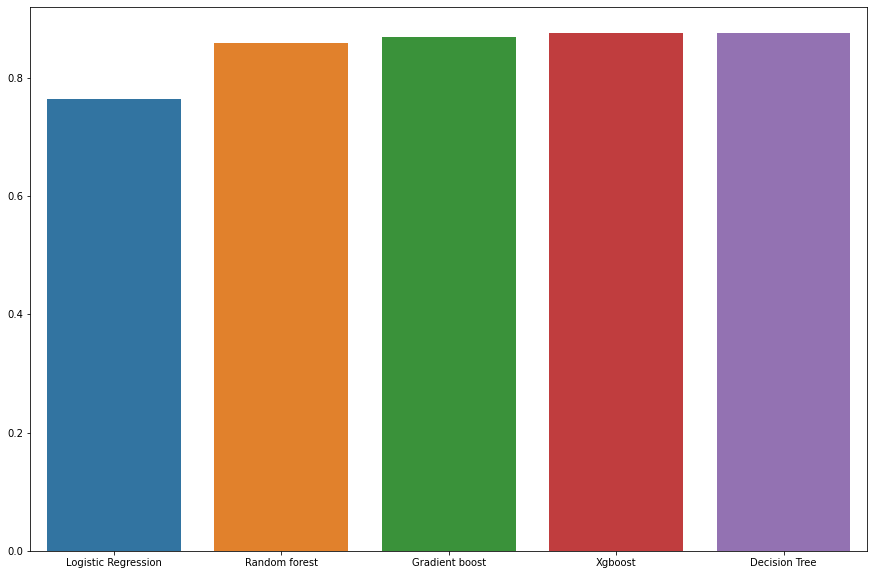

In [124]:
figure(figsize=(15,10))
sns.barplot(x='models',y='values',data=data)
plt.show

In [125]:
# It obvious that the best model and most consistent is Xg